In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
# from scipy.spatial.distance import cdist
from Modules.KbMOM_v8_4_before_5 import KbMOM

# simple example

In [2]:
d = 4
s=2
centers = d*np.array([
    [0,0],
    [0,1],
    [0,-1]
])
cluster_std = np.array([
    [[5*s,0],
    [0,5*s]],
    [[1,0],
    [0,1]],
    [[1,0],
    [0,1]],
])
cluster_std = np.array([5,1,1])
n_samples = np.array([10,100,100])

K = 2

In [3]:
X,y = make_blobs(centers=centers,cluster_std=cluster_std,n_samples=n_samples)

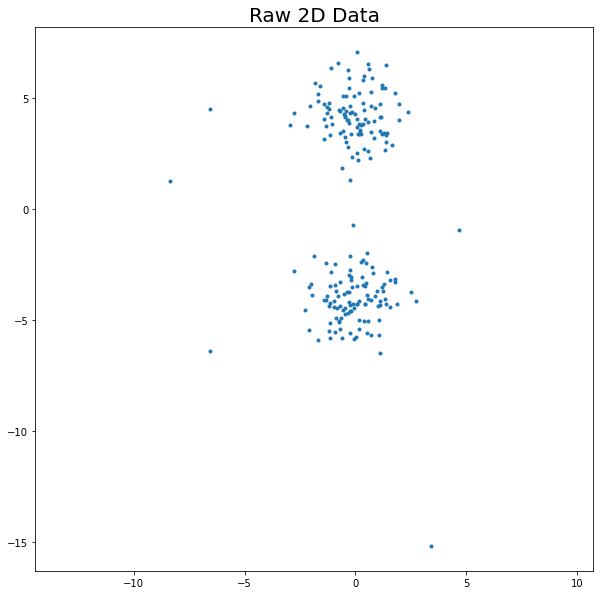

In [4]:
ax0 = X[:,0]
ax1 = X[:,1]
color_func = plt.get_cmap('tab10')
fig,axis = plt.subplots(1,1,figsize=(10,10))
axis.plot(ax0,ax1,'.')
axis.axis('equal')
axis.set_title('Raw 2D Data',fontsize=20)
plt.savefig("graph/data_2D_K2")
plt.show()

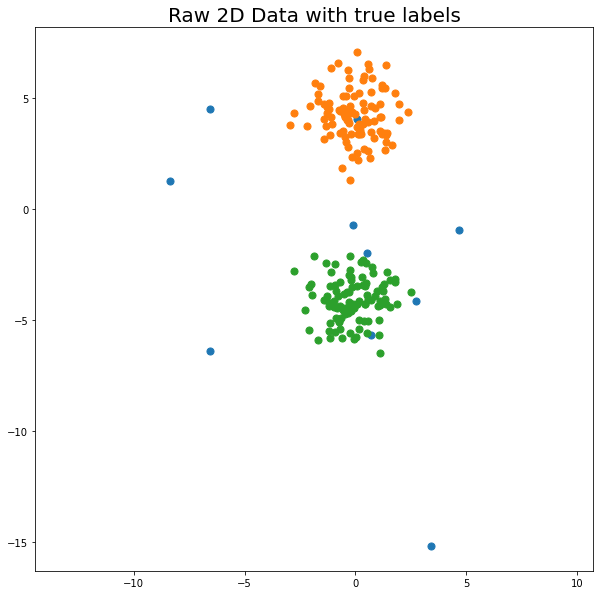

In [5]:
fig,axis = plt.subplots(1,1,figsize=(10,10))
for k in range(K+1):
    axis.scatter(ax0[y == k],ax1[y == k],color=color_func(k),s=50)
axis.axis('equal')
axis.set_title('Raw 2D Data with true labels',fontsize=20)
plt.savefig("graph/data_2D_K2_true")
plt.show()

In [6]:
from Modules.KbMOM_v8_4_before_5 import KbMOM

## depth when strategy is "centroids_distances"

In [7]:
KbMOM_instance = KbMOM(X=X,K=K,nbr_blocks=50,nb_min_repr_by_cluster=1,score_strategy='centroids_distances')

In [8]:
res = KbMOM_instance.fit(X=X)

In [9]:
y_pred = KbMOM_instance.predict(X=X)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [10]:
ax0 = X[:,0]
ax1 = X[:,1]
scores = res['scores']


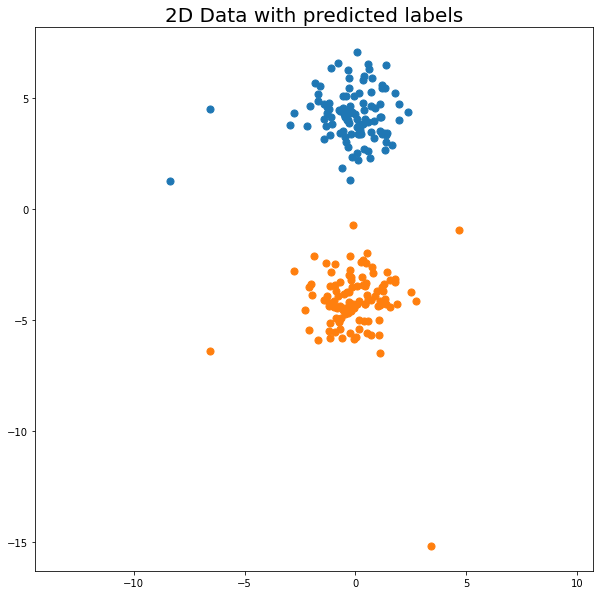

In [11]:
fig,axis = plt.subplots(1,1,figsize=(10,10))
for k in range(K):
    axis.scatter(ax0[y_pred == k],ax1[y_pred == k],color=color_func(k),s=50)
axis.axis('equal')
axis.set_title('2D Data with predicted labels',fontsize=20)
plt.savefig("graph/data_2D_K2_pred")
plt.show()

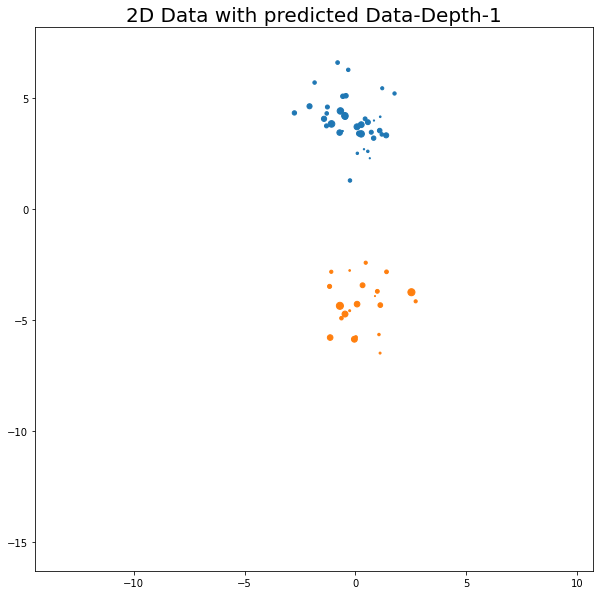

In [12]:
fig,axis = plt.subplots(1,1,figsize=(10,10))
for k in range(K):
    axis.scatter(ax0[y_pred == k],ax1[y_pred == k],color=color_func(k),s=50*scores[y_pred == k])
axis.axis('equal')
axis.set_title('2D Data with predicted Data-Depth-1',fontsize=20)
plt.savefig("graph/data_2D_K2_scores_1")
plt.show()

## depth when strategy is "block_members_distances"

In [13]:
KbMOM_instance = KbMOM(X=X,K=K,nbr_blocks=50,nb_min_repr_by_cluster=1,score_strategy='block_members_distances')

In [14]:
res = KbMOM_instance.fit(X=X)

In [15]:
y_pred = KbMOM_instance.predict(X=X)
# y_pred

In [16]:
ax0 = X[:,0]
ax1 = X[:,1]
color_func = plt.get_cmap('tab10')

mu_pred = KbMOM_instance.get_centers()
# print(f'mu_pred = {mu_pred}')

scores = res['scores']
# print(f'scores = {scores}')

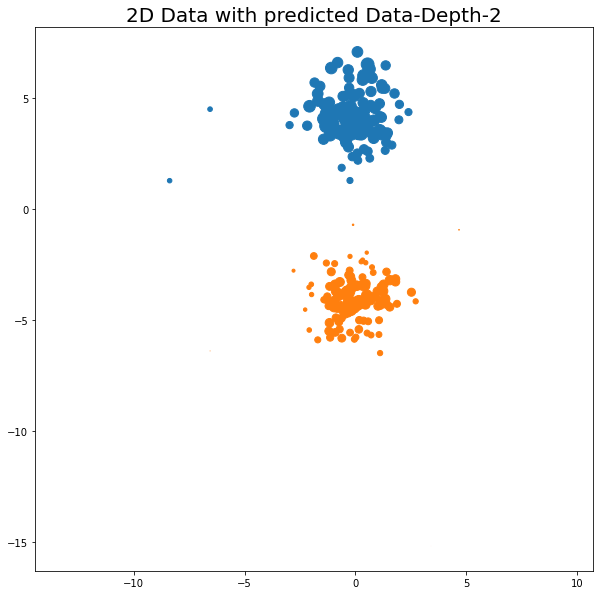

In [17]:
fig,axis = plt.subplots(1,1,figsize=(10,10))
for k in range(K):
    axis.scatter(ax0[y_pred == k],ax1[y_pred == k],s=5*scores[y_pred == k]**2,color=color_func(k))
# axis.scatter(mu_pred[:,0],mu_pred[:,1],color="black")
axis.axis('equal')
axis.set_title('2D Data with predicted Data-Depth-2',fontsize=20)
plt.savefig("graph/data_2D_K2_scores_2")
plt.show()

# Depth robust to wrong K (K too small)

In [18]:
d = 4
s=2
centers = d*np.array([
    [0,0],
    [0,1],
    [0,-1],
    [5,0],
    [2,2],
    [-3,-1],
    [-3,5],
])
cluster_std = np.array([5*s,1,1,s,1,1,3])
n_samples = np.array([100,100,100,100,100,100,100])

K = 2
K_true = len(centers)-1

In [19]:
X,y = make_blobs(centers=centers,cluster_std=cluster_std,n_samples=n_samples)

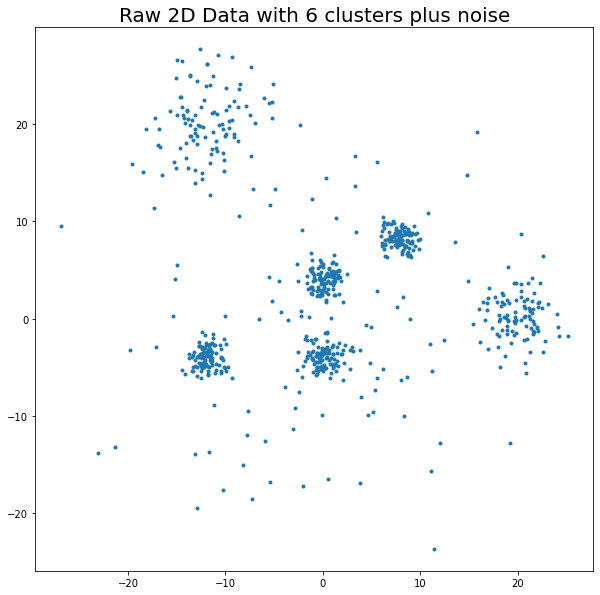

In [20]:
ax0 = X[:,0]
ax1 = X[:,1]
fig,axis = plt.subplots(1,1,figsize=(10,10))
axis.plot(ax0,ax1,'.')
axis.axis('equal')
axis.set_title(f'Raw 2D Data with {K_true} clusters plus noise',fontsize=20)
plt.savefig(f"graph/data_2D_K{K_true}")
plt.show()

## depth when strategy is "centroids_distances"

In [21]:
KbMOM_instance = KbMOM(X=X,K=K,nbr_blocks=50,nb_min_repr_by_cluster=1,score_strategy='centroids_distances')

In [22]:
res = KbMOM_instance.fit(X=X)

In [23]:
y_pred = KbMOM_instance.predict(X=X)
# y_pred

In [24]:
ax0 = X[:,0]
ax1 = X[:,1]
color_func = plt.get_cmap('tab10')
scores = res['scores']


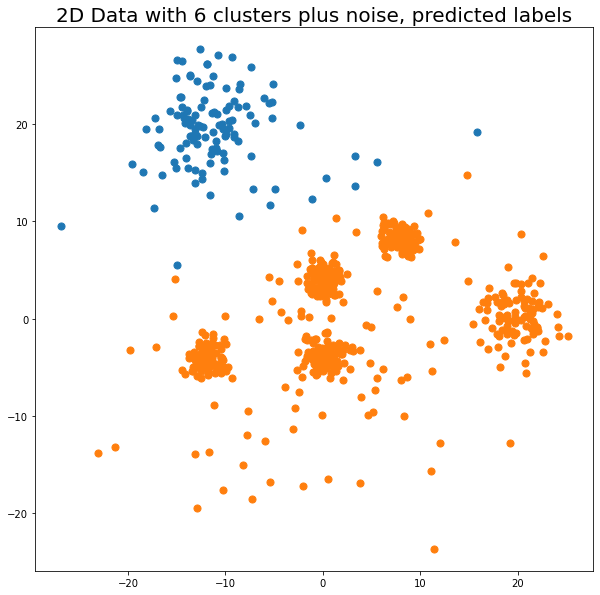

In [25]:
fig,axis = plt.subplots(1,1,figsize=(10,10))
for k in range(K):
    axis.scatter(ax0[y_pred == k],ax1[y_pred == k],color=color_func(k),s=50)
axis.axis('equal')
axis.set_title(f'2D Data with {K_true} clusters plus noise, predicted labels',fontsize=20)
plt.savefig(f"graph/data_2D_K{K_true}_pred")
plt.show()

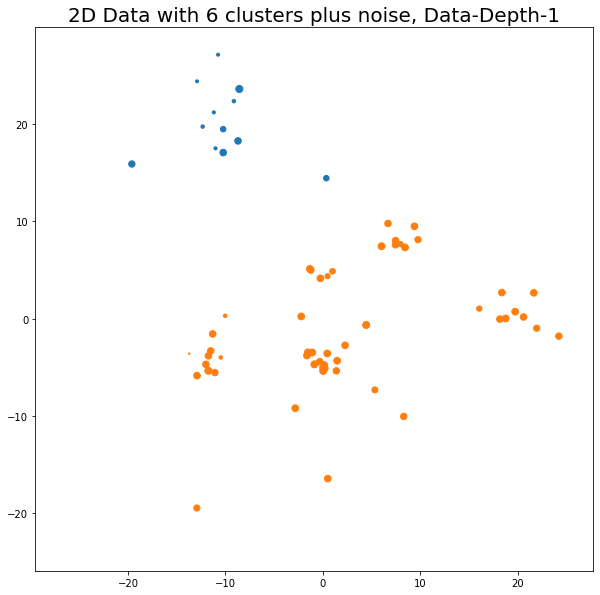

In [26]:
fig,axis = plt.subplots(1,1,figsize=(10,10))
for k in range(K):
    axis.scatter(ax0[y_pred == k],ax1[y_pred == k],color=color_func(k),s=50*scores[y_pred == k])
axis.axis('equal')
axis.set_title(f'2D Data with {K_true} clusters plus noise, Data-Depth-1',fontsize=20)
plt.savefig(f"graph/data_2D_K{K_true}_score_1")
plt.show()

## depth when strategy is "block_members_distances"

In [27]:
KbMOM_instance = KbMOM(X=X,K=K,nbr_blocks=50,nb_min_repr_by_cluster=1,score_strategy='block_members_distances')

In [28]:
res = KbMOM_instance.fit(X=X)

In [29]:
y_pred = KbMOM_instance.predict(X=X)
# y_pred

In [30]:
ax0 = X[:,0]
ax1 = X[:,1]
color_func = plt.get_cmap('tab10')

mu_pred = KbMOM_instance.get_centers()
# print(f'mu_pred = {mu_pred}')

scores = res['scores']
# print(f'scores = {scores}')

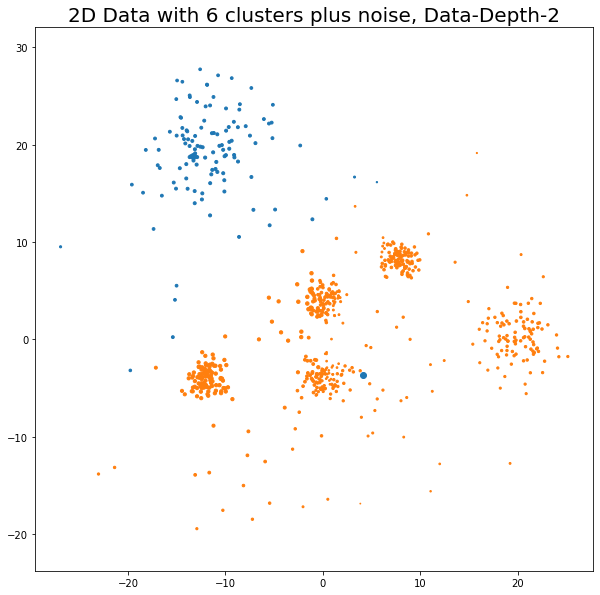

In [31]:
threshold = 0
fig,axis = plt.subplots(1,1,figsize=(10,10))
sizes = (scores-scores.min())/(scores.max()-scores.min())
for k in range(K):
    mask = np.logical_and(y_pred == k,sizes > threshold)
    axis.scatter(ax0[mask],ax1[mask],s=15*sizes[mask],color=color_func(k))
    
axis.scatter(mu_pred[:,0],mu_pred[:,1])
axis.axis('equal')
axis.set_title(f'2D Data with {K_true} clusters plus noise, Data-Depth-2',fontsize=20)
plt.savefig(f"graph/data_2D_K{K_true}_score_2")
plt.show()

# Depth robust to wrong K (K way too big)

In [32]:
# d = 4
# s=2
# centers = d*np.array([
#     [0,0],
#     [0,1],
#     [0,-1],
#     [5,0],
#     [2,2],
#     [-3,-1],
#     [-3,5]
# ])
# cluster_std = np.array([5*s,1,1,s,1,1,3])
# n_samples = np.array([100,100,100,100,100,100,100])

K = 15

In [33]:
# X,y = make_blobs(centers=centers,cluster_std=cluster_std,n_samples=n_samples)

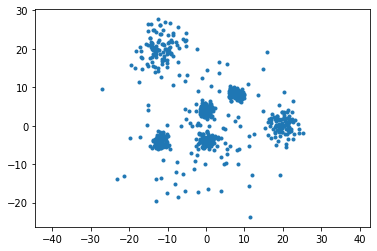

In [34]:
ax0 = X[:,0]
ax1 = X[:,1]
fig,axis = plt.subplots(1,1)
axis.plot(ax0,ax1,'.')
axis.axis('equal')
plt.show()

## depth when strategy is "centroids_distances"

In [35]:
KbMOM_instance = KbMOM(X=X,K=K,nbr_blocks=50,nb_min_repr_by_cluster=1,score_strategy='centroids_distances')

In [36]:
res = KbMOM_instance.fit(X=X)

In [37]:
y_pred = KbMOM_instance.predict(X=X)
# y_pred

In [38]:
ax0 = X[:,0]
ax1 = X[:,1]
color_func = plt.get_cmap('tab20')
scores = res['scores']


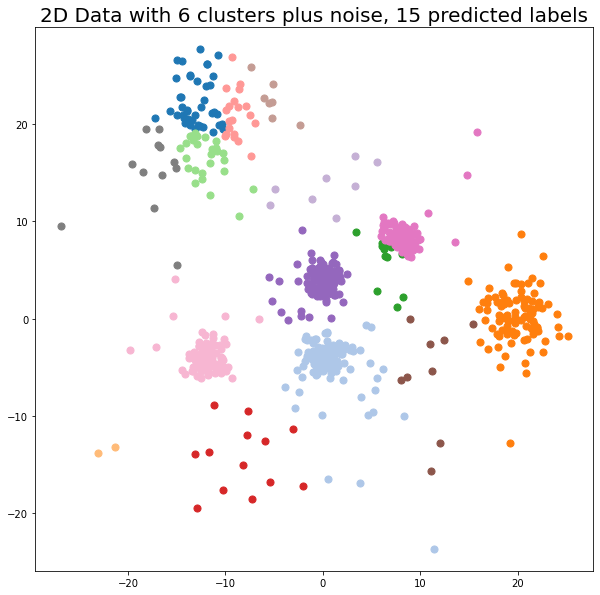

In [39]:
fig,axis = plt.subplots(1,1,figsize=(10,10))
for k in range(K):
    axis.scatter(ax0[y_pred == k],ax1[y_pred == k],color=color_func(k),s=50)
axis.axis('equal')
axis.set_title(f'2D Data with {K_true} clusters plus noise, {K} predicted labels',fontsize=20)
plt.savefig(f"graph/data_2D_K{K_true}_wayK2Big_pred")
plt.show()

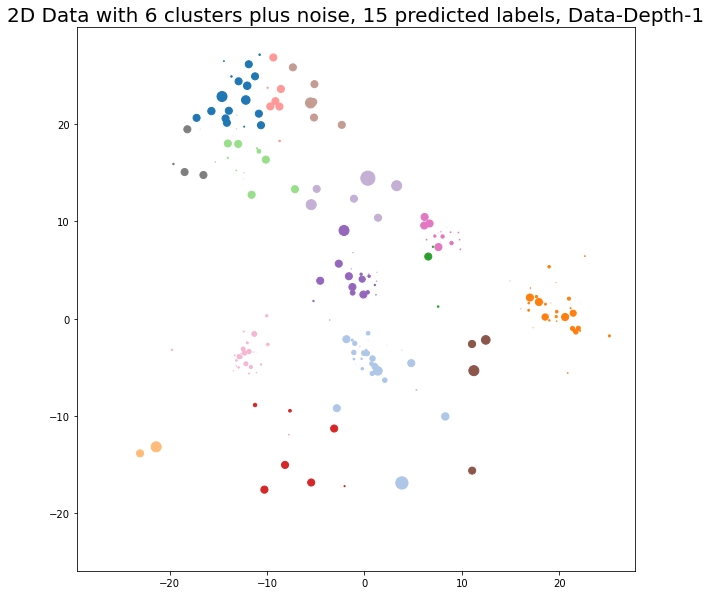

In [40]:
fig,axis = plt.subplots(1,1,figsize=(10,10))
for k in range(K):
    axis.scatter(ax0[y_pred == k],ax1[y_pred == k],color=color_func(k),s=50*scores[y_pred == k])
axis.axis('equal')
axis.set_title(f'2D Data with {K_true} clusters plus noise, {K} predicted labels, Data-Depth-1',fontsize=20)
plt.savefig(f"graph/data_2D_K{K_true}_wayK2Big_score_1")
plt.show()

## depth when strategy is "block_members_distances"

In [41]:
KbMOM_instance = KbMOM(X=X,K=K,nbr_blocks=50,nb_min_repr_by_cluster=1,score_strategy='block_members_distances')

In [42]:
res = KbMOM_instance.fit(X=X)

In [43]:
y_pred = KbMOM_instance.predict(X=X)
# y_pred

In [44]:
ax0 = X[:,0]
ax1 = X[:,1]
# color_func = plt.get_cmap('tab10')

mu_pred = KbMOM_instance.get_centers()
# print(f'mu_pred = {mu_pred}')

scores = res['scores']
# print(f'scores = {scores}')

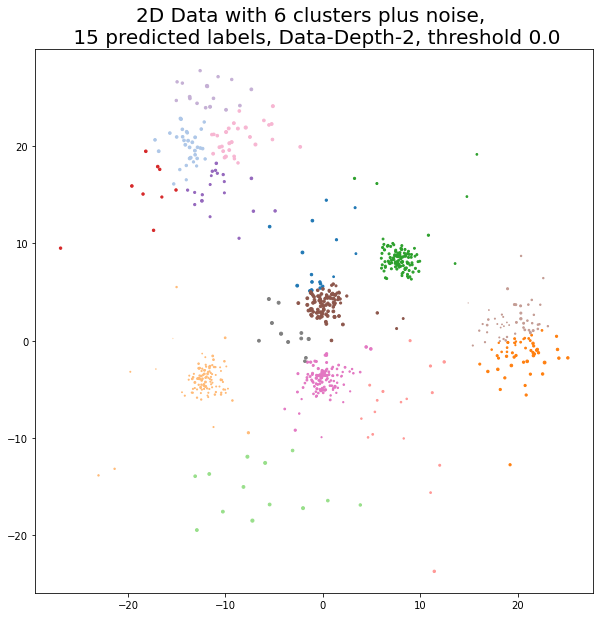

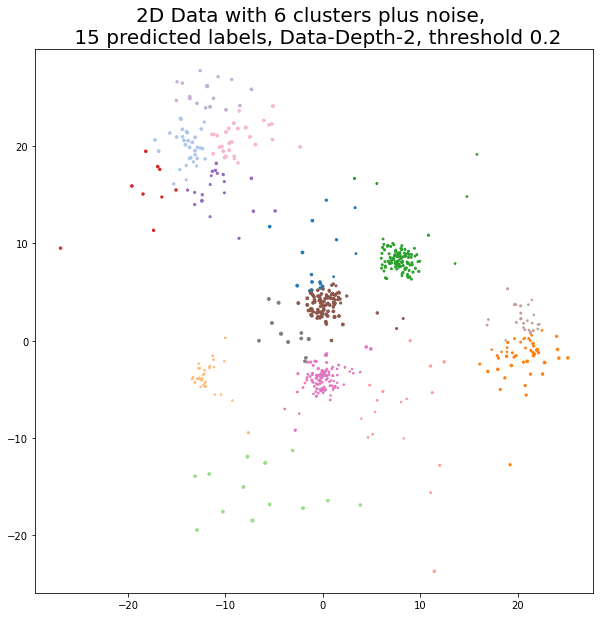

In [45]:
for key,threshold in enumerate(np.linspace(start=0,stop=0.2,num=2)):
    fig,axis = plt.subplots(1,1,figsize=(10,10))
    sizes = (scores-scores.min())/(scores.max()-scores.min())
    for k in range(K):
        mask = np.logical_and(y_pred == k,sizes > threshold)
        axis.scatter(ax0[mask],ax1[mask],s=10*sizes[mask],color=color_func(k))
#     axis.scatter(mu_pred[:,0],mu_pred[:,1],color='black')
    axis.axis('equal')
    axis.set_title(f'2D Data with {K_true} clusters plus noise, \n {K} predicted labels, Data-Depth-2, threshold {threshold}',fontsize=20)
    plt.savefig(f"graph/data_2D_K{K_true}_wayK2Big_score_2_threshold{key}")
    plt.show()

# Depth robust to wrong K (K too big)

In [46]:
# d = 4
# s=2
# centers = d*np.array([
#     [0,0],
#     [0,1],
#     [0,-1],
#     [5,0],
#     [2,2],
#     [-3,-1],
# ])
# cluster_std = np.array([5*s,1,1,s,1,1])
# n_samples = np.array([100,100,100,100,100,100])

K = 8

In [47]:
# X,y = make_blobs(centers=centers,cluster_std=cluster_std,n_samples=n_samples)

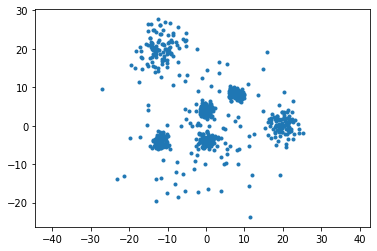

In [48]:
ax0 = X[:,0]
ax1 = X[:,1]
fig,axis = plt.subplots(1,1)
axis.plot(ax0,ax1,'.')
axis.axis('equal')
plt.show()

## depth when strategy is "centroids_distances"

In [49]:
KbMOM_instance = KbMOM(X=X,K=K,nbr_blocks=50,nb_min_repr_by_cluster=1,score_strategy='centroids_distances')

In [50]:
res = KbMOM_instance.fit(X=X)

In [51]:
y_pred = KbMOM_instance.predict(X=X)
# y_pred

In [52]:
ax0 = X[:,0]
ax1 = X[:,1]
color_func = plt.get_cmap('tab20')
scores = res['scores']


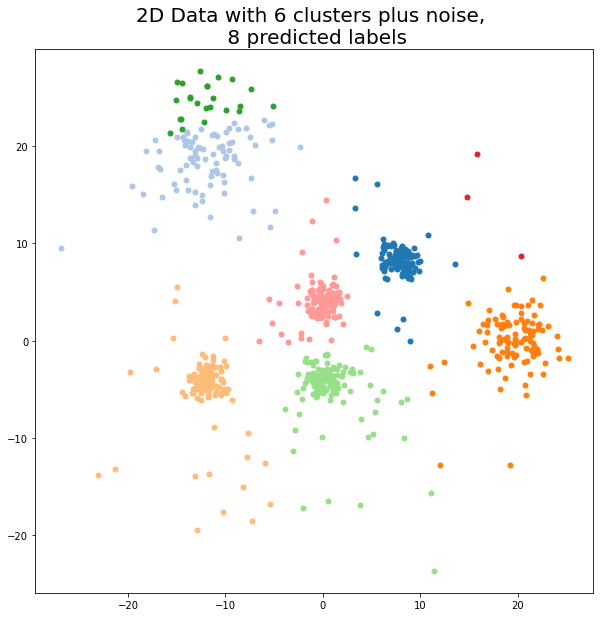

In [53]:
fig,axis = plt.subplots(1,1,figsize=(10,10))
for k in range(K):
    axis.scatter(ax0[y_pred == k],ax1[y_pred == k],color=color_func(k),s=25)
axis.axis('equal')
axis.set_title(f'2D Data with {K_true} clusters plus noise, \n {K} predicted labels',fontsize=20)
plt.savefig(f"graph/data_2D_K{K_true}_K2Big_pred")
plt.show()

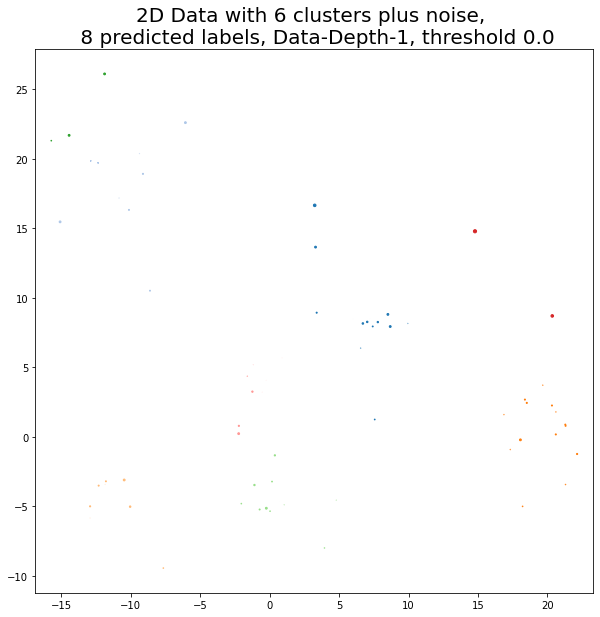

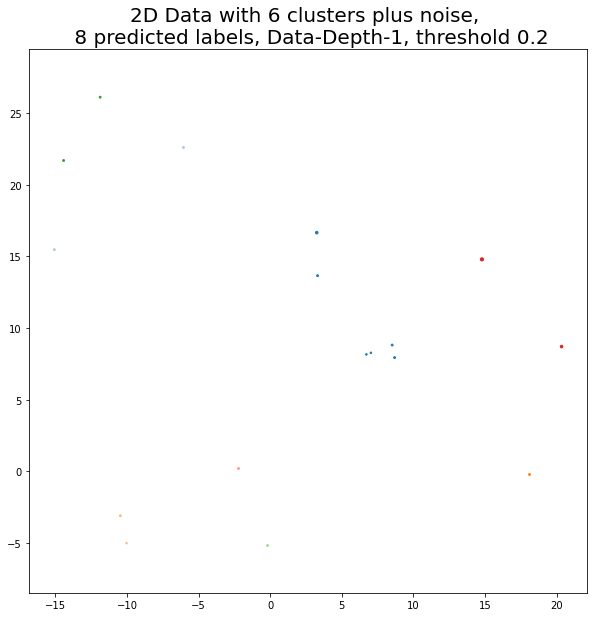

In [54]:
sizes = (scores-scores.min())/(scores.max()-scores.min())
for key,threshold in enumerate(np.linspace(start=0,stop=0.2,num=2)):
    fig,axis = plt.subplots(1,1,figsize=(10,10))
    for k in range(K):
        mask = np.logical_and(y_pred == k,sizes > threshold)
        axis.scatter(ax0[mask],ax1[mask],s=10*sizes[mask],color=color_func(k))
#     axis.scatter(mu_pred[:,0],mu_pred[:,1],color=color_func(0),marker="*")
    axis.axis('equal')
    axis.set_title(f'2D Data with {K_true} clusters plus noise, \n {K} predicted labels, Data-Depth-1, threshold {threshold}',fontsize=20)
    plt.savefig(f"graph/data_2D_K{K_true}_K2Big_score_1_threshold{key}")
    plt.show()

## depth when strategy is "block_members_distances"

In [55]:
KbMOM_instance = KbMOM(X=X,K=K,nbr_blocks=50,nb_min_repr_by_cluster=1,score_strategy='block_members_distances')

In [56]:
res = KbMOM_instance.fit(X=X)

In [57]:
y_pred = KbMOM_instance.predict(X=X)
# y_pred

In [58]:
ax0 = X[:,0]
ax1 = X[:,1]

mu_pred = KbMOM_instance.get_centers()
# print(f'mu_pred = {mu_pred}')

scores = res['scores']
# print(f'scores = {scores}')

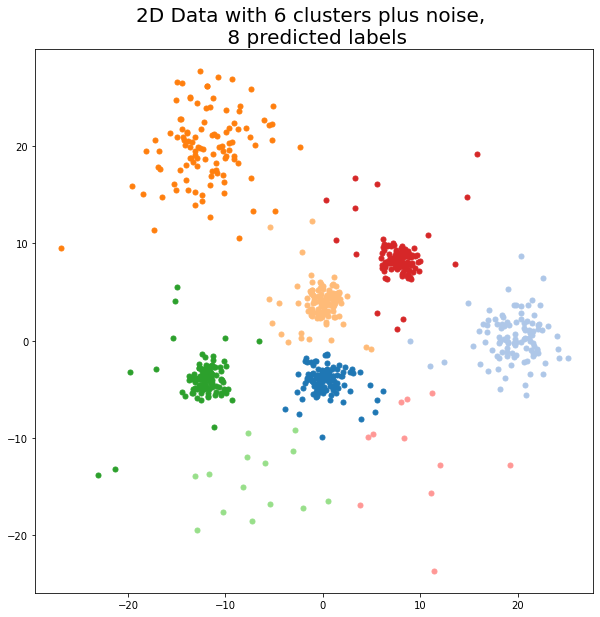

In [59]:
fig,axis = plt.subplots(1,1,figsize=(10,10))
for k in range(K):
    axis.scatter(ax0[y_pred == k],ax1[y_pred == k],color=color_func(k),s=25)
axis.axis('equal')
axis.set_title(f'2D Data with {K_true} clusters plus noise, \n {K} predicted labels',fontsize=20)
plt.savefig(f"graph/data_2D_K{K_true}_K2Big_pred")
plt.show()

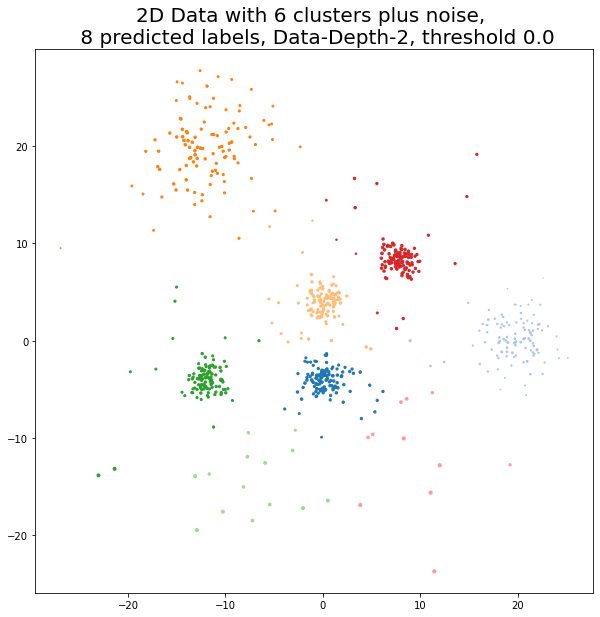

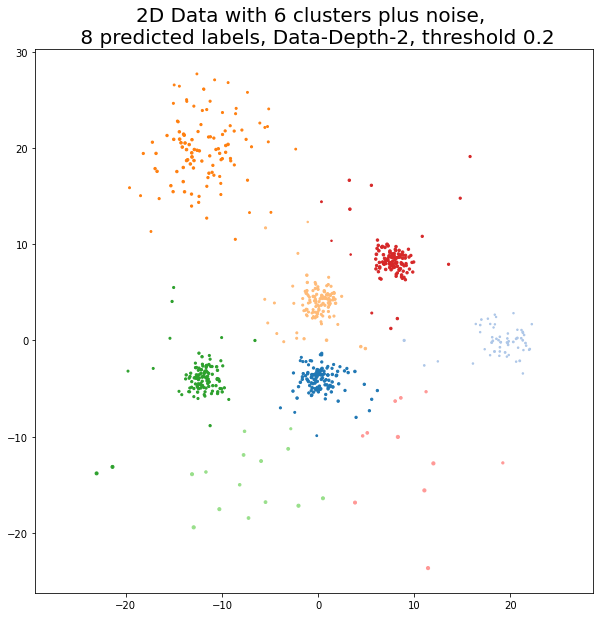

In [60]:
sizes = (scores-scores.min())/(scores.max()-scores.min())
for threshold in np.linspace(start=0,stop=0.2,num=2):
    fig,axis = plt.subplots(1,1,figsize=(10,10))
    for k in range(K):
        mask = np.logical_and(y_pred == k,sizes > threshold)
        axis.scatter(ax0[mask],ax1[mask],s=10*sizes[mask],color=color_func(k))
#     axis.scatter(mu_pred[:,0],mu_pred[:,1],color=color_func(0),marker="*")
    axis.axis('equal')
    axis.set_title(f'2D Data with {K_true} clusters plus noise, \n {K} predicted labels, Data-Depth-2, threshold {threshold}',fontsize=20)
    plt.savefig(f"graph/data_2D_K{K_true}_K2Big_score_1")
    plt.show()

<h1>

# increase dimensionality

In [61]:
p = 50

centers = d*np.array([
    [0]*p
])
K = 15
mu,y = make_blobs(centers=centers,n_samples=K,cluster_std=5)
mu = np.concatenate([mu,np.array([[0]*p])],axis=0)

n_samples = 1000
cluster_std = np.array([5]*K+[15])
X,y = make_blobs(centers=mu,n_samples=n_samples,cluster_std=cluster_std)
K_true = len(mu)-1

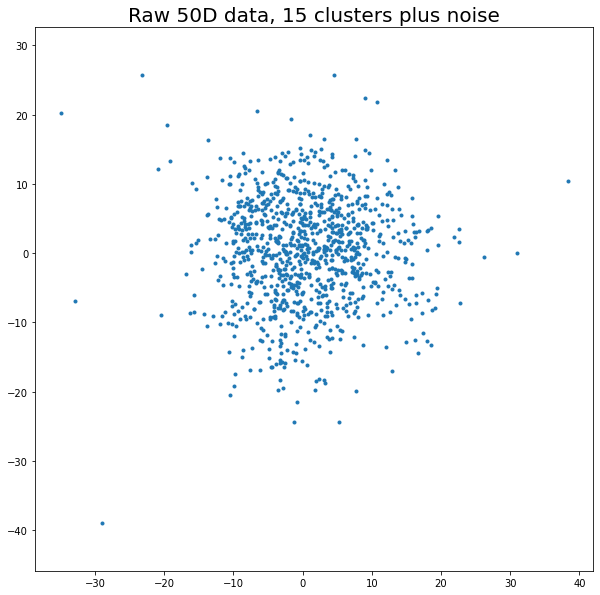

In [62]:
ax0 = X[:,0]
ax1 = X[:,1]
fig,axis = plt.subplots(1,1,figsize=(10,10))
axis.plot(ax0,ax1,'.')
axis.axis('equal')
axis.set_title(f'Raw 50D data, {K_true} clusters plus noise',fontsize=20)
# plt.savefig(f'graph/data_{p}D_K{K_true}')
plt.show()

## depth when strategy is "centroids_distances"

#### KbMOM

In [63]:
K = 4
KbMOM_instance = KbMOM(X=X,K=K,nbr_blocks=150,coef_ech=52,nb_min_repr_by_cluster=1,score_strategy='centroids_distances')

In [64]:
res = KbMOM_instance.fit(X=X)

In [65]:
y_pred = KbMOM_instance.predict(X=X)
# y_pred

In [66]:
ax0 = X[:,0]
ax1 = X[:,1]
color_func = plt.get_cmap('tab10')
scores = res['scores']


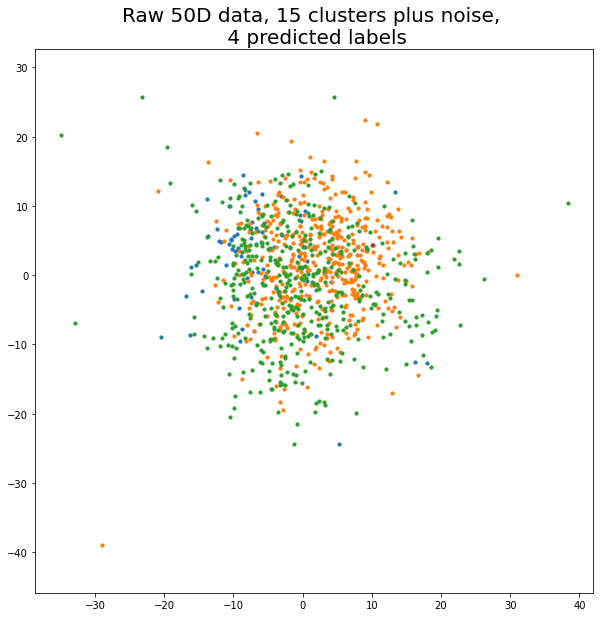

In [67]:
fig,axis = plt.subplots(1,1,figsize=(10,10))
for k in range(K):
    axis.scatter(ax0[y_pred == k],ax1[y_pred == k],color=color_func(k),s=10)
axis.axis('equal')
axis.set_title(f'Raw 50D data, {K_true} clusters plus noise, \n {K} predicted labels',fontsize=20)
# plt.savefig(f'graph/data_{p}D_K{K_true}_pred')
plt.show()

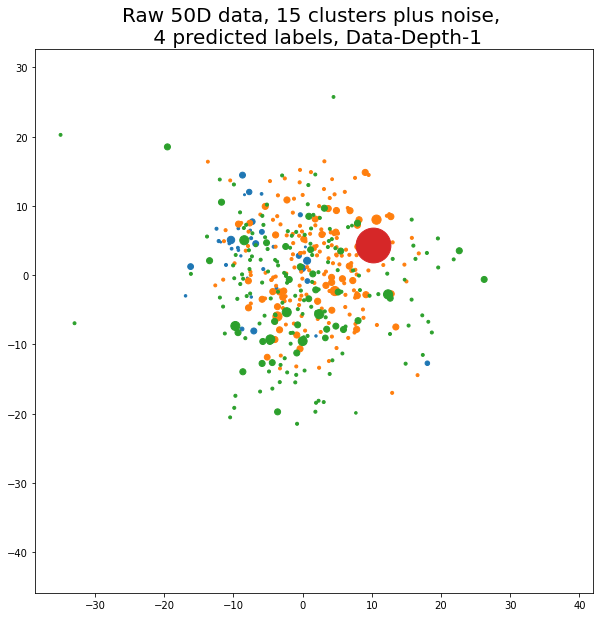

In [68]:
fig,axis = plt.subplots(1,1,figsize=(10,10))
for k in range(K):
    axis.scatter(ax0[y_pred == k],ax1[y_pred == k],color=color_func(k),s=10*scores[y_pred == k]**2)
axis.axis('equal')
axis.set_title(f'Raw 50D data, {K_true} clusters plus noise, \n {K} predicted labels, Data-Depth-1',fontsize=20)
# plt.savefig(f'graph/data_{p}D_K{K_true}_score_1')
plt.show()

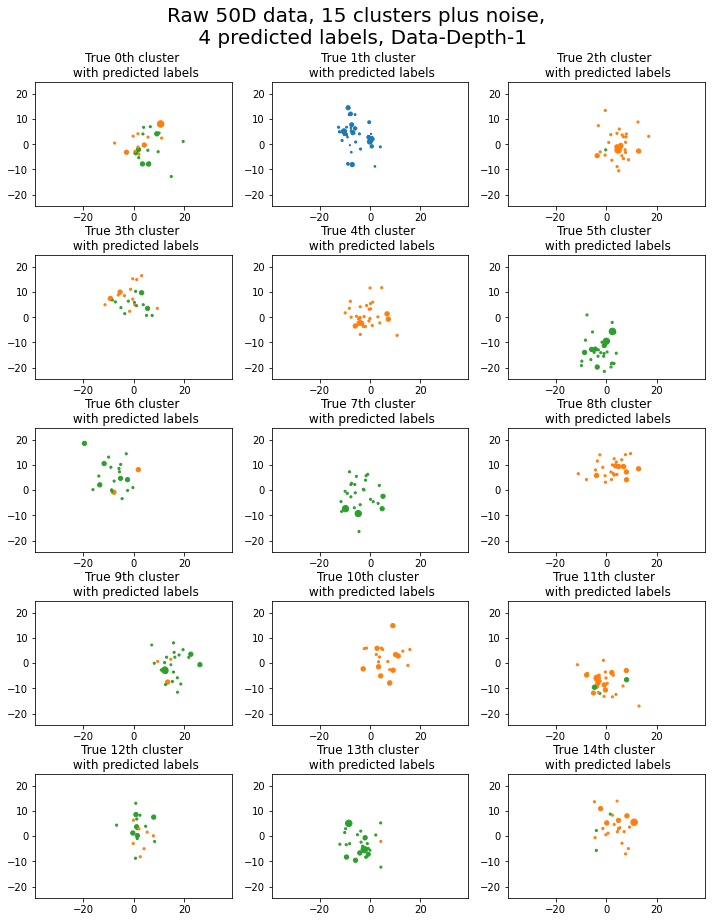

In [69]:
ncols = 3
nrows = int(K_true/ncols)
sizes_fig_v = 3
sizes_fig_h = 4
fig,axis = plt.subplots(ncols=ncols,nrows=nrows,figsize=(sizes_fig_h*ncols,sizes_fig_v*nrows))
for k in range(K_true):
    axis[int(k/ncols),k%ncols].scatter(ax0[y == k],ax1[y == k],s=5*scores[y == k]**2,color=color_func(y_pred[y == k]))
    axis[int(k/ncols),k%ncols].axis('equal')
    axis[int(k/ncols),k%ncols].set_title(f'True {k}th cluster \n with predicted labels')
    xylim = max(np.max(np.abs(ax0)),np.max(np.abs(ax1)))
    axis[int(k/ncols),k%ncols].set_xlim(-xylim,xylim)
    axis[int(k/ncols),k%ncols].set_ylim(-xylim,xylim)
st = fig.suptitle(f'Raw 50D data, {K_true} clusters plus noise, \n {K} predicted labels, Data-Depth-1',fontsize=20)
st.set_y(0.95)
plt.subplots_adjust(hspace=0.4)
# plt.savefig(f'graph/data_{p}D_K{K_true}_score_1_mosaic')
plt.show()

#### K-means

In [70]:
from sklearn.cluster import KMeans

In [71]:
KMeans_instance = KMeans(n_clusters=K,n_init=1,random_state=1)

In [72]:
res_KMeans = KMeans_instance.fit(X=X)

In [73]:
y_pred = res_KMeans.predict(X=X)
# y_pred

In [74]:
# ax0 = X[:,0]
# ax1 = X[:,1]
# # color_func = plt.get_cmap('tab10')


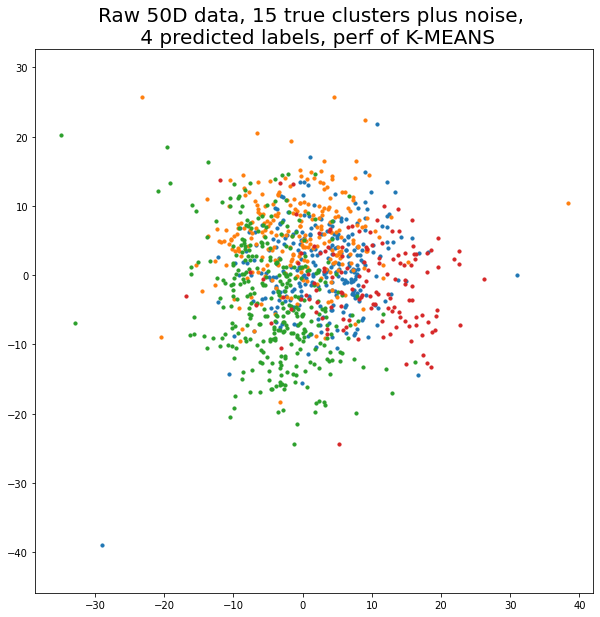

In [75]:
fig,axis = plt.subplots(1,1,figsize=(10,10))
for k in range(K):
    axis.scatter(ax0[y_pred == k],ax1[y_pred == k],color=color_func(k),s=10)
axis.axis('equal')
axis.set_title(f'Raw 50D data, {K_true} true clusters plus noise, \n {K} predicted labels, perf of K-MEANS',fontsize=20)
# plt.savefig(f'graph/data_{p}D_K{K_true}_pred')
plt.show()

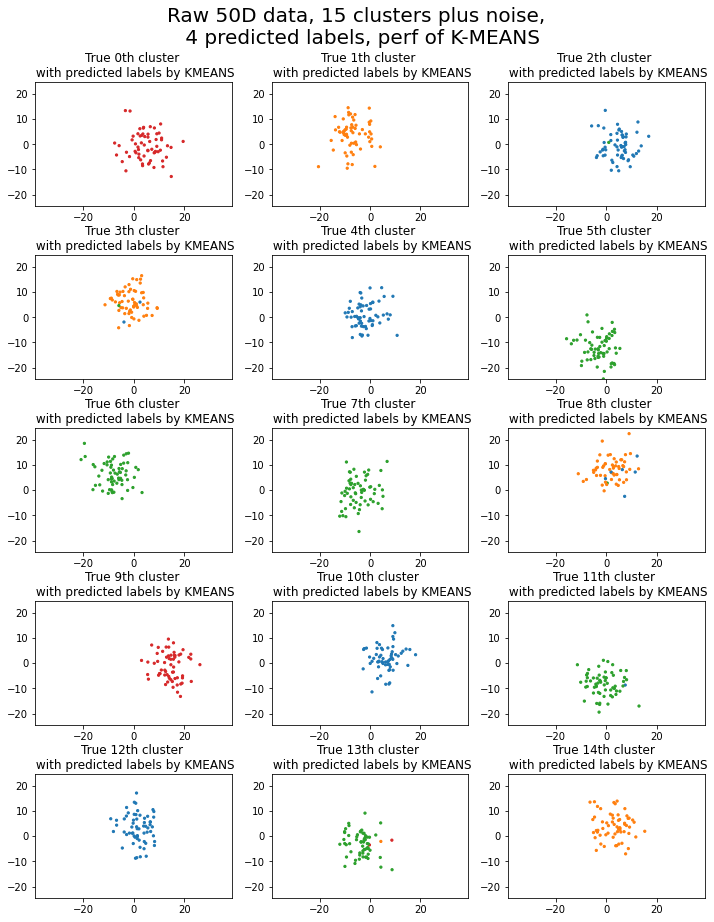

In [76]:
ncols = 3
nrows = int(K_true/ncols)
sizes_fig_v = 3
sizes_fig_h = 4
fig,axis = plt.subplots(ncols=ncols,nrows=nrows,figsize=(sizes_fig_h*ncols,sizes_fig_v*nrows))
for k in range(K_true):
    axis[int(k/ncols),k%ncols].scatter(ax0[y == k],ax1[y == k],s=5,color=color_func(y_pred[y == k]))
    axis[int(k/ncols),k%ncols].axis('equal')
    axis[int(k/ncols),k%ncols].set_title(f'True {k}th cluster \n with predicted labels by KMEANS')
    xylim = max(np.max(np.abs(ax0)),np.max(np.abs(ax1)))
    axis[int(k/ncols),k%ncols].set_xlim(-xylim,xylim)
    axis[int(k/ncols),k%ncols].set_ylim(-xylim,xylim)
st = fig.suptitle(f'Raw 50D data, {K_true} clusters plus noise, \n {K} predicted labels, perf of K-MEANS',fontsize=20)
st.set_y(0.95)
plt.subplots_adjust(hspace=0.4)
# plt.savefig(f'graph/data_{p}D_K{K_true}_KMEANS_mosaic')
plt.show()

## depth when strategy is "block_members_distances"

In [77]:
KbMOM_instance = KbMOM(X=X,K=K,nbr_blocks=150,coef_ech=52,nb_min_repr_by_cluster=1,score_strategy='block_members_distances')

In [78]:
res = KbMOM_instance.fit(X=X)

In [79]:
y_pred = KbMOM_instance.predict(X=X)
# y_pred

In [80]:
ax0 = X[:,0]
ax1 = X[:,1]
# color_func = plt.get_cmap('tab10')

mu_pred = KbMOM_instance.get_centers()
# print(f'mu_pred = {mu_pred}')

scores = res['scores']
# print(f'scores = {scores}')

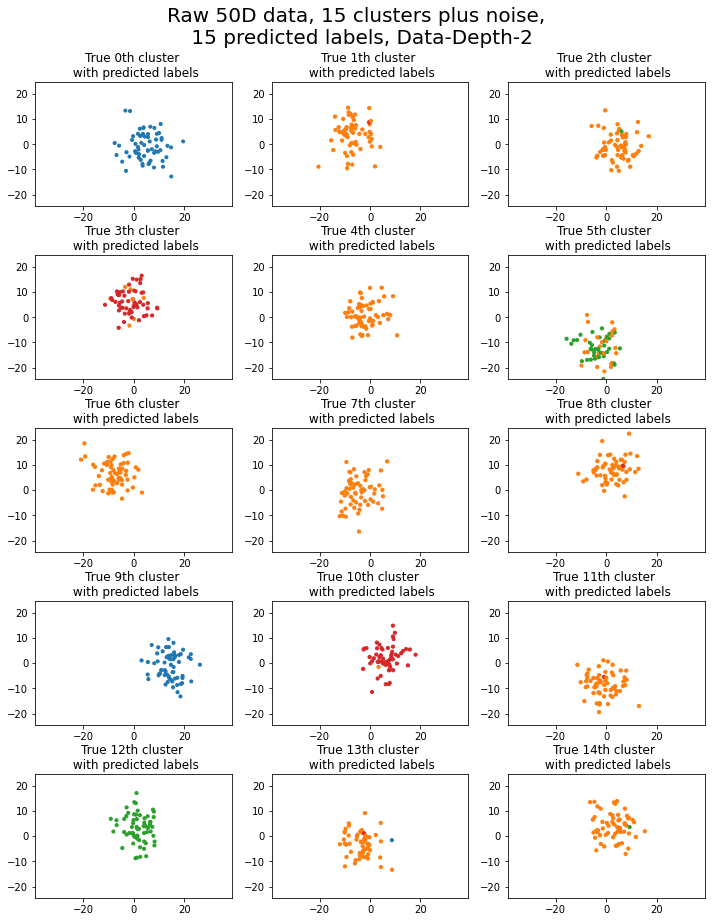

In [81]:
ncols = 3
nrows = int(K_true/ncols)
sizes_fig_v = 3
sizes_fig_h = 4
fig,axis = plt.subplots(ncols=ncols,nrows=nrows,figsize=(sizes_fig_h*ncols,sizes_fig_v*nrows))
for k in range(K_true):
    axis[int(k/ncols),k%ncols].scatter(ax0[y == k],ax1[y == k],s=0.1*scores[y == k]**2,color=color_func(y_pred[y == k]))
    axis[int(k/ncols),k%ncols].axis('equal')
    axis[int(k/ncols),k%ncols].set_title(f'True {k}th cluster \n with predicted labels')
    xylim = max(np.max(np.abs(ax0)),np.max(np.abs(ax1)))
    axis[int(k/ncols),k%ncols].set_xlim(-xylim,xylim)
    axis[int(k/ncols),k%ncols].set_ylim(-xylim,xylim)
st = fig.suptitle(f'Raw 50D data, {K_true} clusters plus noise, \n {K_true} predicted labels, Data-Depth-2',fontsize=20)
st.set_y(0.95)
plt.subplots_adjust(hspace=0.4)
# plt.savefig(f'graph/data_{p}D_K{K_true}_score_2')
plt.show()

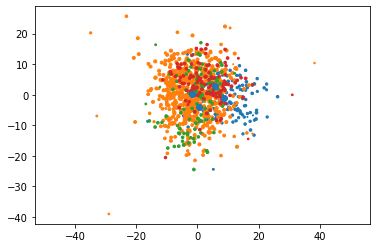

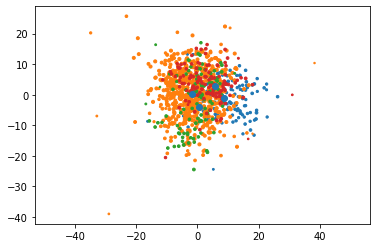

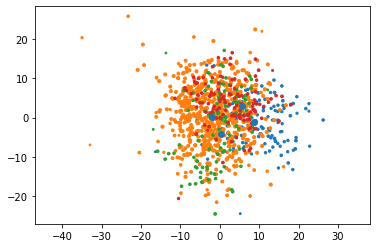

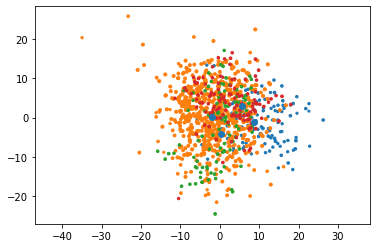

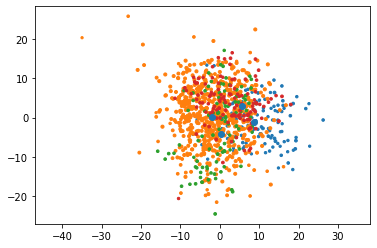

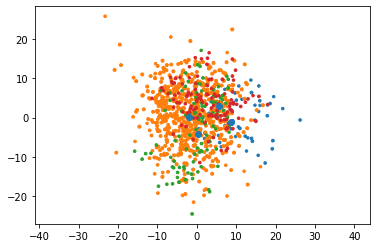

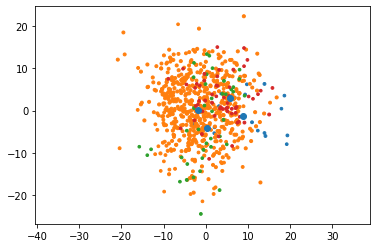

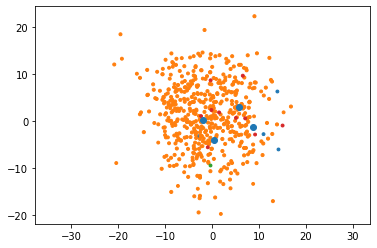

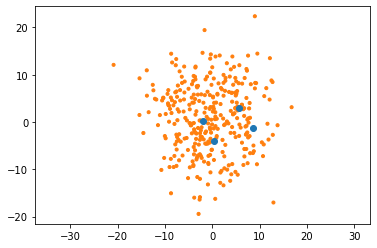

In [82]:
for threshold in np.linspace(start=0.1,stop=0.9,num=9):
    fig,axis = plt.subplots(1,1)
    sizes = (scores-scores.min())/(scores.max()-scores.min())
    for k in range(K):
        mask = np.logical_and(y_pred == k,sizes > threshold)
        axis.scatter(ax0[mask],ax1[mask],s=10*sizes[mask],color=color_func(k))

    axis.scatter(mu_pred[:,0],mu_pred[:,1])
    axis.axis('equal')
    plt.show()

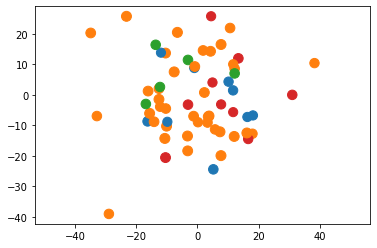

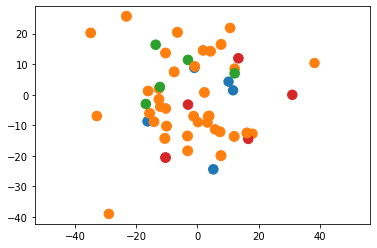

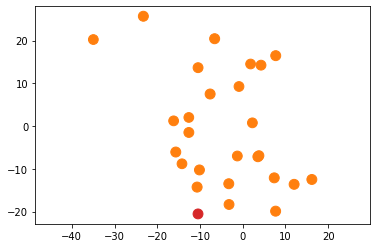

In [95]:
for threshold in [0,0.2,0.4]:
    fig,axis = plt.subplots(1,1)
    k = 15
    mask = np.logical_and(y == k,sizes > threshold)
    axis.scatter(ax0[mask],ax1[mask],color=color_func(y_pred[mask]),s=10*scores[mask])
    axis.axis('equal')
    plt.show()